In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Append the directory to your python path using os
os.chdir('/content/drive/MyDrive/Youtube_video_classifier')


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("youtube_data.csv")

In [ ]:
df["description"][5600]

'#vn #vbucks #vbadge #vba #vblog \n#lkc #lkc #op #oilpastel #qwali #qwestraworld #cx #cx5 #cxntury #mlbbcreatorcamp #klannewslajme #mns #mnsnewslive \n#jlpt #klrahul #jleague #kl \n#jk_yadav_ka_video #yiutubeshort #yutubeshorts \n#uinmalang #old #love #lovestatus \n#lokeshgamer #loud #njr \n#cvrnews #vblog #vblog \n#xzdiggaming #xzybcaシ #xzermogaming \n#nba #nba2k22 #nba2k21 #nbayoungboy \n#nba2k #nbahighlights \n#nba2k20 #nba2k23 #nba2k23 \n#nbayoungboytypebeat #nbaplayoffs \n#sd #sdgs #sda #sdyhariini \n#klrahul #kl #klannewslajme #klannews \n#kinemaster #kolkata #king #kimtaehyung #kidsvideo #kitten #kitchen #kidssong #kollywood #kookie \n#nj #bbkivines #bvlocalnews #bvlgari \n#vvs #vc #vck #vca21 \n#fgo #fgc #fg #dfv \n2 #followforfollowback #qwali \n#playstation #lp #please #play \n#playstationtrophy #plants \n#pleasesubscribe #playingsolo \n#plz #playthrough #playing \n#official #pubglite #of #omletarcade #op \n#online #onepiece #onetap #onetap #ooantavaooooantava \n#odisha #old 

In [ ]:
#removing rows which have no description at all
df.dropna(subset=["description"],inplace=True)
df.reset_index(inplace=True)

In [ ]:
def extract_columns(df):
  data = df[["category","category_label","description","tags"]]
  return data

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
eng_stopwords=stopwords.words('english')
lemmatizer = WordNetLemmatizer()
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Preprocess the data

In [ ]:
def preprocessing(df):
  description_with_tags=[]
  for index, row in df.iterrows():
    s=row["description"]
    if not pd.isnull(row["tags"]):
      s = s + row["tags"]
    s=re.sub(r'http\S+', '', s)
    s=re.findall(r'\w+', s.lower())
    s_dummy = []
    for word in s:                                 #removing all numerical digits from words
      res = ''.join([i for i in word if not i.isdigit()])
      if len(res)>0:s_dummy.append(res)
    s = s_dummy
    s = [lemmatizer.lemmatize(w) for w in s if w not in eng_stopwords] #Removing stopwords and lemmatisation
    description_with_tags.append(s)
  df["description_with_tags"]=description_with_tags
  return df


In [ ]:
data = preprocessing(extract_columns(df))

<ipython-input-9-64a1cd5a2b22>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["description_with_tags"]=description_with_tags


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6263 entries, 0 to 6262
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   category               6263 non-null   object
 1   category_label         6263 non-null   int64 
 2   description            6263 non-null   object
 3   tags                   5367 non-null   object
 4   description_with_tags  6263 non-null   object
dtypes: int64(1), object(4)
memory usage: 244.8+ KB


In [ ]:
# Splitting data into test, validation and training set
from sklearn.model_selection import train_test_split
x_train, x_val , y_train , y_val = train_test_split(data["description_with_tags"],data["category_label"],test_size=0.15,random_state=0,stratify=data["category_label"])



In [ ]:
#  build_vocabulary
def build_vocabulary(corpus):

    vocab = {'': 0, '[UNK]': 1}


    # For each tweet in the training set
    for tweet in corpus:
        # For each word in the tweet
        for word in tweet:
            # If the word is not in vocabulary yet, add it to vocabulary
            if word not in vocab:
                vocab[word] = list(vocab.values())[-1] + 1


    return vocab


vocab = build_vocabulary(x_train)
num_words = len(vocab)

print(f"Vocabulary contains {num_words} words\n")
print(vocab)

Vocabulary contains 50189 words

{'': 0, '[UNK]': 1, 'karate': 2, 'drama': 3, 'annual': 4, 'sport': 5, 'meet': 6, 'th': 7, 'january': 8, 'modern': 9, 'english': 10, 'school': 11, 'bhatapara': 12, 'coach': 13, 'mast': 14, 'nikhil': 15, 'rao': 16, 'np': 17, 'video': 18, 'pyramid': 19, 'display': 20, 'boy': 21, 'link': 22, 'girl': 23, 'demo': 24, 'stunt': 25, 'mass': 26, 'p': 27, 'march': 28, 'past': 29, 'ninjaperfect': 30, 'karatedrama': 31, 'sportsdrama': 32, 'ninja': 33, 'kid': 34, 'skit': 35, 'comedy': 36, 'never': 37, 'underestimate': 38, 'day': 39, 'fight': 40, 'pt': 41, 'perfect': 42, 'show': 43, 'pleased': 44, 'share': 45, 'short': 46, 'amadeus': 47, 'corporate': 48, 'travel': 49, 'network': 50, 'k': 51, 'ctn': 52, 'global': 53, 'conference': 54, 'targeting': 55, 'top': 56, 'corporation': 57, 'selected': 58, 'partner': 59, 'around': 60, 'world': 61, 'joined': 62, 'u': 63, 'discus': 64, 'latest': 65, 'development': 66, 'space': 67, 'delegate': 68, 'participated': 69, 'business': 70

In [ ]:
#max_length
def max_length(training_x, validation_x):

    max_len = max([len(k) for k in list(training_x) + list(validation_x)])


    return max_len

max_len = max_length(x_train, x_val )
print(f'The length of the longest tweet is {max_len} tokens.')

The length of the longest tweet is 1197 tokens.


## Padding the inputs to max length in input

In [ ]:
# padded_sequence
def padded_sequence(tweet, vocab_dict, max_len, unk_token='[UNK]'):

    # Find the ID of the UNK token, to use it when you encounter a new word
    unk_ID = vocab_dict[unk_token]

    # First convert the words to integers by looking up the vocab_dict
    tensor = [vocab_dict.get(k,unk_ID) for k in tweet]

    if len(tensor) > max_len: return tensor[:max_len]

    # Then pad the tensor with zeroes up to the length max_len
    padded_tensor = tensor + [0]*(max_len-len(tensor))

    return padded_tensor

In [ ]:
train_x_padded = [padded_sequence(x, vocab, max_len) for x in x_train]
val_x_padded = [padded_sequence(x, vocab, max_len) for x in x_val]



In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as layers

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

Found GPU at: /device:GPU:0


In [ ]:

def create_model(num_words, embedding_dim, max_len):

    tf.random.set_seed(123)
    with tf.device(device_name):
      model = tf.keras.Sequential([
          tf.keras.layers.Embedding(num_words,embedding_dim, input_length = max_len),
          tf.keras.layers.GlobalAveragePooling1D(),
          tf.keras.layers.Dense(9,activation='softmax')
      ])

      model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.optimizers.Adam(learning_rate = 0.00125),
                    metrics=['accuracy'])


    return model

In [ ]:
# Create the model
model = create_model(num_words=num_words, embedding_dim=32, max_len=max_len)

print('The model is created!\n')

The model is created!



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1197, 32)          1606048   
                                                                 
 global_average_pooling1d (  (None, 32)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 9)                 297       
                                                                 
Total params: 1606345 (6.13 MB)
Trainable params: 1606345 (6.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Prepare the data
train_x_prepared = np.array(train_x_padded)
val_x_prepared = np.array(val_x_padded)

train_y_prepared = np.array(y_train)
val_y_prepared = np.array(y_val)

print('The data is prepared for training!\n')

The data is prepared for training!



In [ ]:
print('Training:')
history = model.fit(train_x_prepared, train_y_prepared, epochs=50,shuffle=True, validation_data=(val_x_prepared, val_y_prepared))

Training:
Epoch 1/50
167/167 [==============================] - 29s 163ms/step - loss: 2.1046 - accuracy: 0.2166 - val_loss: 2.0488 - val_accuracy: 0.2106
Epoch 2/50
167/167 [==============================] - 25s 150ms/step - loss: 2.0272 - accuracy: 0.2824 - val_loss: 1.9995 - val_accuracy: 0.2606
Epoch 3/50
167/167 [==============================] - 18s 106ms/step - loss: 1.9663 - accuracy: 0.3156 - val_loss: 1.9287 - val_accuracy: 0.3574
Epoch 4/50
167/167 [==============================] - 14s 84ms/step - loss: 1.8869 - accuracy: 0.3847 - val_loss: 1.8468 - val_accuracy: 0.3830
Epoch 5/50
167/167 [==============================] - 14s 83ms/step - loss: 1.7969 - accuracy: 0.4223 - val_loss: 1.7583 - val_accuracy: 0.4266
Epoch 6/50
167/167 [==============================] - 10s 60ms/step - loss: 1.7039 - accuracy: 0.4636 - val_loss: 1.6741 - val_accuracy: 0.4543
Epoch 7/50
167/167 [==============================] - 10s 61ms/step - loss: 1.6149 - accuracy: 0.4789 - val_loss: 1.5928 - 

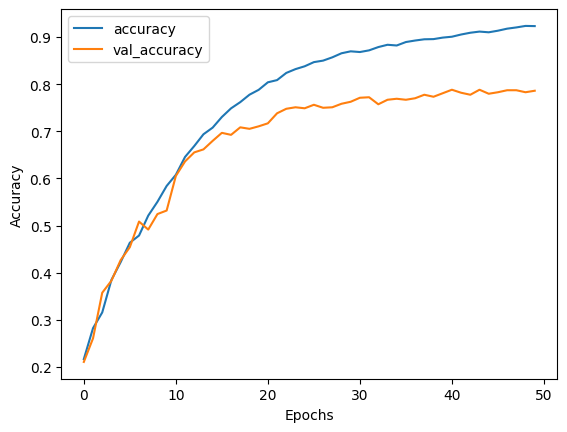

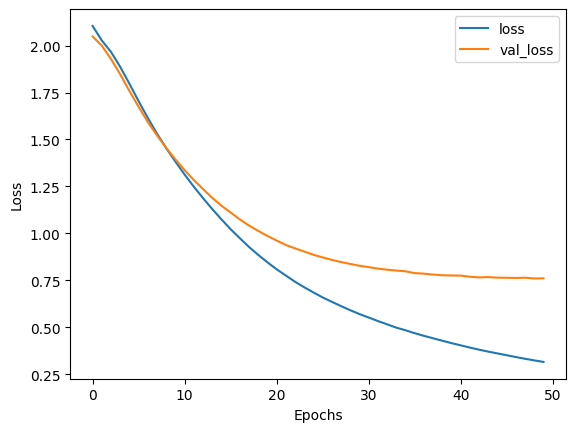

In [ ]:
import matplotlib.pyplot as plt
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric.title())
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_metrics(history, "accuracy")
plot_metrics(history, "loss")

In [ ]:
prediction = model.predict(val_x_prepared, verbose=False)
prediction.shape

(940, 9)

In [ ]:
y_pred = np.argmax(prediction, axis=1)
y_pred.shape

(940,)

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(val_y_prepared,y_pred)
acc

0.7861702127659574

In [ ]:
categories = ['music','sports','gaming','education','film/animation','entertainment','news and politics','comedy','other']
y_true = [categories[k] for k in val_y_prepared]
y_predicted = [categories[k] for k in y_pred]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_predicted,labels=categories)
cm

array([[ 90,   0,   0,   1,   0,   2,   0,   0,   6],
       [  0,  33,   0,   1,   1,   0,   0,   0,   6],
       [  0,   0,  39,   1,   1,   6,   0,   0,  10],
       [  0,   1,   0, 164,   1,   5,   1,   0,  22],
       [  1,   0,   0,   1,  66,  19,   0,   0,  13],
       [  0,   0,   3,   9,  11, 129,   0,   3,  21],
       [  0,   1,   1,   0,   0,   4,  74,   0,   2],
       [  0,   0,   0,   1,   0,   6,   0,  33,   9],
       [  3,   1,   2,  11,   0,   8,   2,   4, 111]])

In [ ]:
from collections import Counter
Counter(y_true)

Counter({'sports': 41,
         'film/animation': 100,
         'other': 142,
         'news and politics': 82,
         'education': 194,
         'music': 99,
         'entertainment': 176,
         'comedy': 49,
         'gaming': 57})

## HeatMap

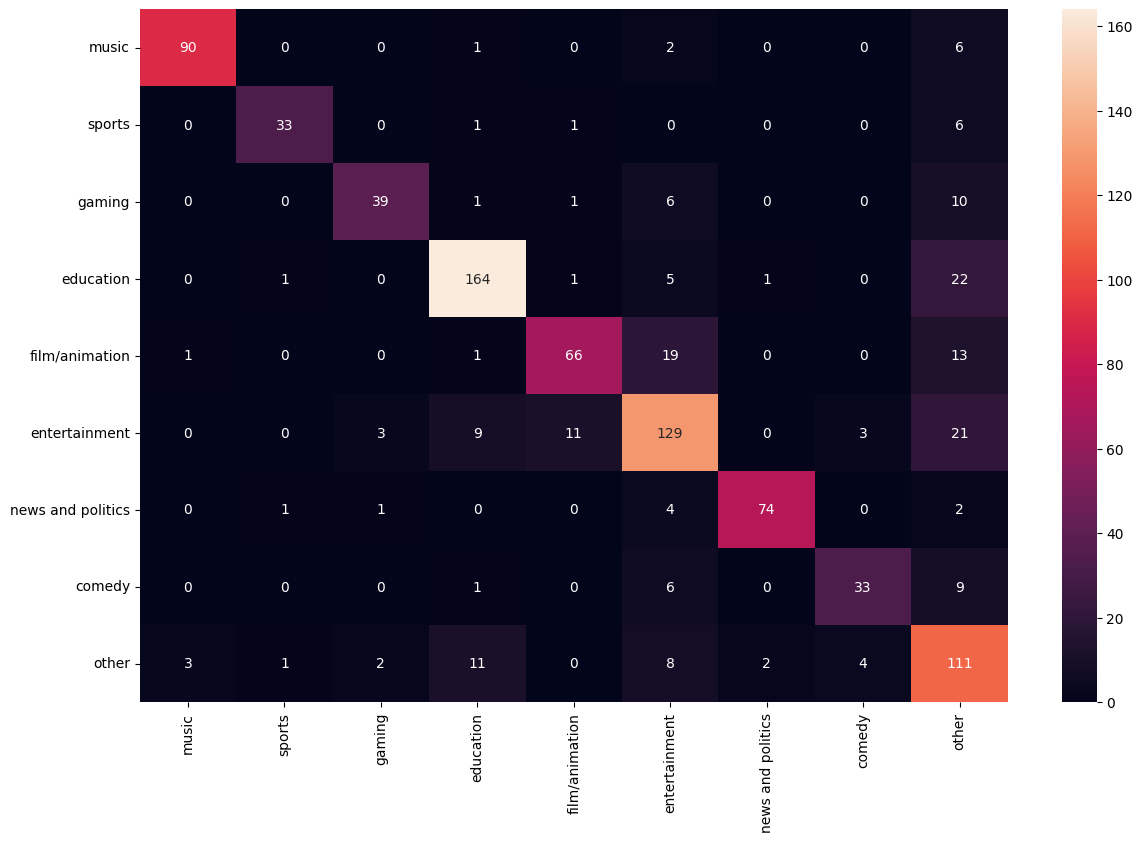

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,9))
sns.heatmap(cm,annot=cm,xticklabels=categories,yticklabels=categories,fmt='.5g')
plt.show()

In [ ]:
model.save('model_1.keras')

In [ ]:
import pickle
with open('vocabulary_model_1.pkl', 'wb') as fp:
    pickle.dump(vocab, fp)